In [77]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [78]:
dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV,CLASS
0,2.542400,0.000000,0.000000,0.000000,0.658124,0.000000,0.000000,0.0,0.385790,0.0,0.624237,0.000000,0.000000,0.0,0.0,0.0,entailment
1,2.356793,0.000000,0.000000,0.000000,0.000000,1.224963,0.000000,0.0,0.963250,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,entailment
2,3.281627,0.000000,0.000000,0.000000,1.125973,0.000000,0.573775,0.0,0.000000,0.0,0.607777,0.000000,0.000000,0.0,0.0,0.0,contradiction
3,2.461393,0.000000,2.282951,0.000000,1.731715,0.000000,0.000000,0.0,1.099049,0.0,1.295804,0.000000,0.000000,0.0,0.0,0.0,contradiction
4,1.614665,0.000000,0.000000,0.000000,0.350315,0.000000,0.000000,0.0,0.293673,0.0,0.000000,0.000000,0.357102,0.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.710075,0.274734,0.000000,0.000000,0.000000,1.233097,0.000000,0.0,0.247773,0.0,0.694806,0.000000,0.000000,0.0,0.0,0.0,entailment
96,1.321407,0.000000,0.000000,0.000000,0.636309,0.000000,0.000000,0.0,0.000000,0.0,0.719443,0.000000,0.000000,0.0,0.0,0.0,entailment
97,1.055430,0.000000,0.641396,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.045653,0.000000,0.000000,0.0,0.0,0.0,contradiction
98,1.339892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.860057,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,contradiction


In [79]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.881990,0.058599,0.164600,0.082751,0.506549,0.125585,0.051362,0.052191,0.348631,0.047858,0.446970,0.029931,0.041809,0.002313,0.013680,0.012051
std,0.949409,0.187344,0.467801,0.313345,0.538999,0.300875,0.254913,0.224003,0.460627,0.153219,0.553401,0.143291,0.153656,0.023125,0.076325,0.100842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.248608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.711361,0.000000,0.000000,0.000000,0.399078,0.000000,0.000000,0.000000,0.239174,0.000000,0.337143,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.358077,0.000000,0.000000,0.000000,0.759413,0.000000,0.000000,0.000000,0.464630,0.000000,0.686612,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.399959,0.828765,2.869047,1.902082,2.173910,1.233097,2.320341,1.417337,2.368589,0.714920,3.355250,1.029944,0.778637,0.231254,0.639196,0.986702


In [80]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


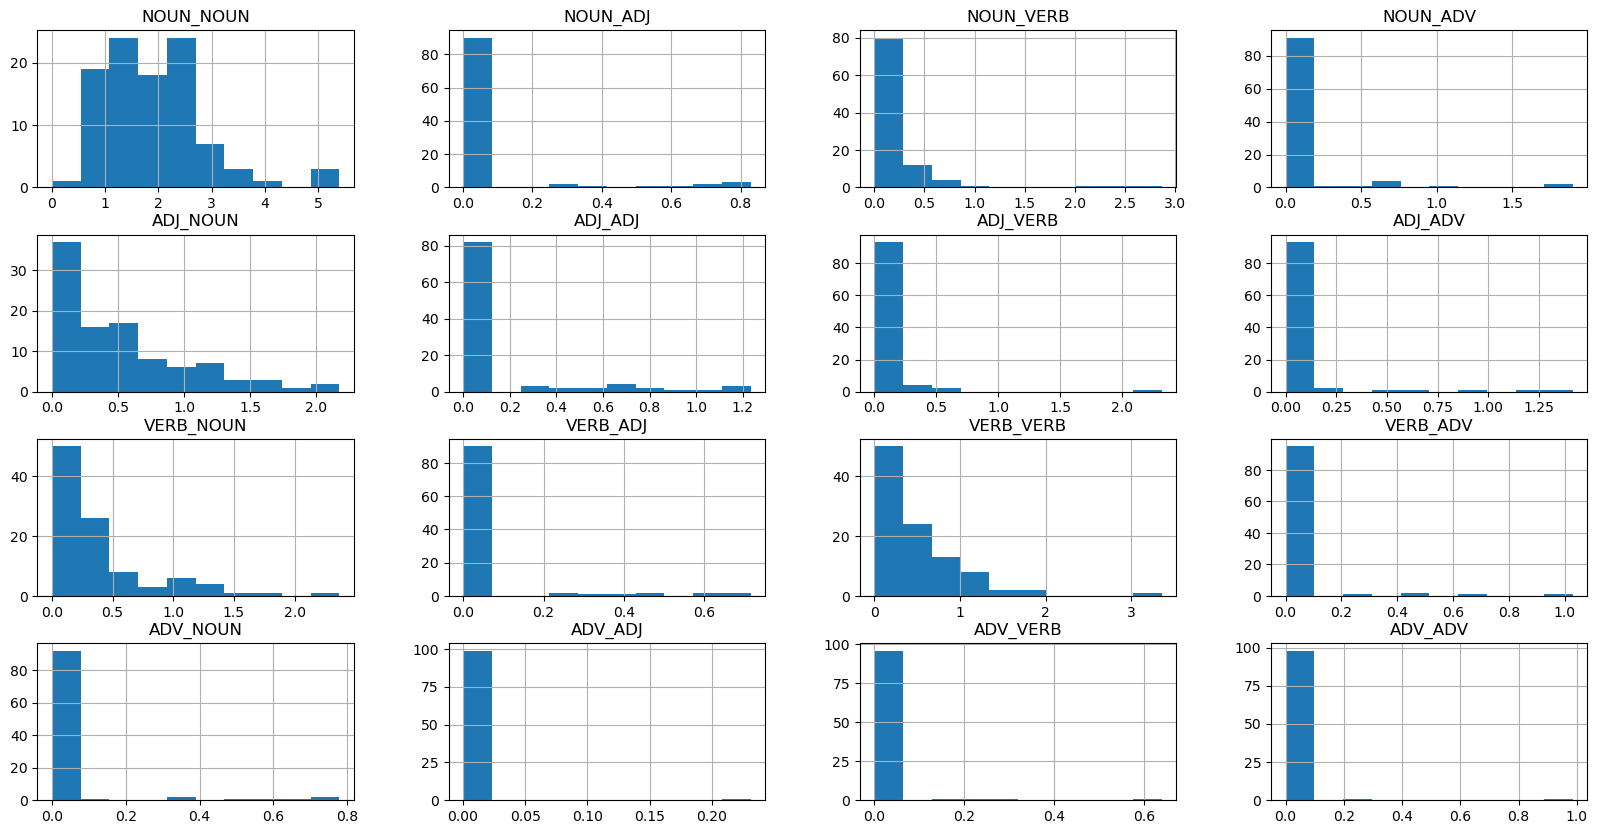

In [81]:
dataframe.hist(figsize=(20,10))
plt.show()

In [82]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [83]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [84]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_23456\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_23456\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 16)

In [85]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [86]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [87]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [88]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
model.decision_function(X)

array([[-1.15386648e-01,  2.80313569e-01, -1.64926921e-01],
       [-2.07725295e-01,  8.57165529e-02,  1.22008742e-01],
       [-1.09172915e-01,  4.38701242e-01, -3.29528327e-01],
       [-1.57390029e-02,  6.42958999e-01, -6.27219996e-01],
       [-1.49853737e-01,  3.38870353e-02,  1.15966702e-01],
       [ 9.44280558e-02,  2.40817021e-01, -3.35245077e-01],
       [-2.11099880e-01,  1.98401129e-01,  1.26987506e-02],
       [-2.94755864e-01,  1.05792333e-01,  1.88963531e-01],
       [-3.61437923e-01,  1.54098849e-01,  2.07339074e-01],
       [ 8.80041581e-02,  1.69182041e-01, -2.57186199e-01],
       [-3.55280319e-01,  2.67863809e-02,  3.28493938e-01],
       [-1.21684175e-01,  4.22512396e-01, -3.00828221e-01],
       [-5.49280103e-01,  1.07689164e+00, -5.27611533e-01],
       [-1.40290970e-01,  3.00490972e-01, -1.60200002e-01],
       [-1.71173313e-01,  2.90840644e-01, -1.19667332e-01],
       [ 4.60601503e-02, -1.12510724e-01,  6.64505734e-02],
       [-3.09280656e-01,  1.04919504e+00

In [90]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [91]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [92]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [93]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  8 VERB_NOUN 5 ADJ_ADJ
Entailment  10 VERB_VERB 8 VERB_NOUN
Neutral  1 NOUN_ADJ 10 VERB_VERB


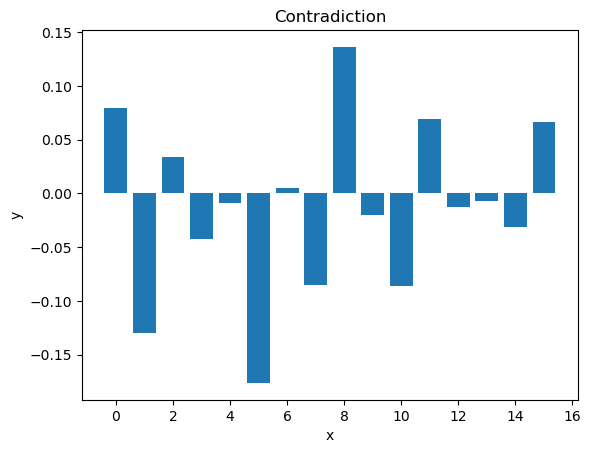

In [94]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,16,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

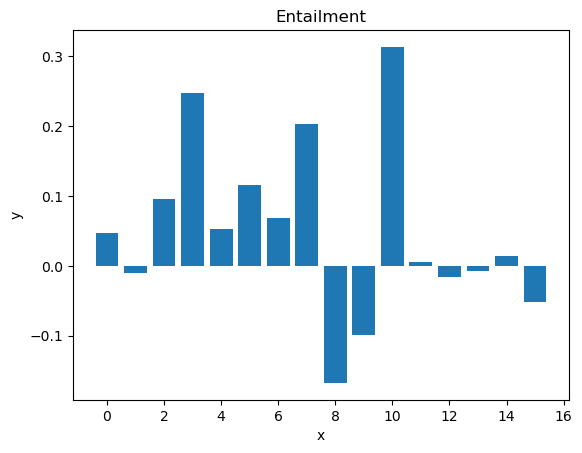

In [95]:
x_v = np.arange(0,16,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

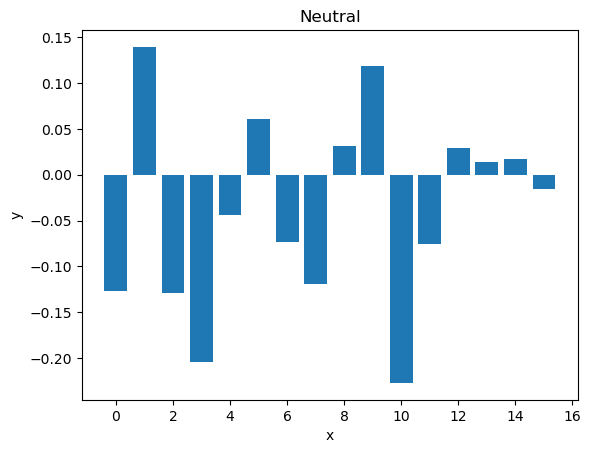

In [96]:
x_v = np.arange(0,16,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [97]:
predictions = model.predict(X)
print(predictions)

['entailment' 'neutral' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'neutral' 'neutral' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entai

In [98]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [99]:
X

array([[2.54240022, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.35679286, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.28162732, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.0554299 , 0.        , 0.64139593, ..., 0.        , 0.        ,
        0.        ],
       [1.33989195, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.42804723, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [100]:
model.score(X,y)

0.48

In [209]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [210]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.411111 (0.157527)


In [211]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.4


In [212]:
print(confusion_matrix(Y_validation, predictions))

[[0 2 0]
 [0 4 0]
 [0 4 0]]


In [213]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.40      1.00      0.57         4
      neutral       0.00      0.00      0.00         4

     accuracy                           0.40        10
    macro avg       0.13      0.33      0.19        10
 weighted avg       0.16      0.40      0.23        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
#X_new = pd.DataFrame()
#model.predict(X_new)